# MATH 210 Introduction to Mathematical Computing

## November 6, 2020

* Error formula for Euler's method
* Heun's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Error formula for Euler's method

Consider $y' = f(t,y)$, $y(t_0)=y_0$ and let $y(t)$ be the solution. For step size $h$, we have the local (truncation) error

$$
E_{local}(h) = | y(t_1) - y_1 | \leq \frac{K_2 h^2}{2}
$$

where $|y''(t)| \leq K_2$ for all $t \in [t_0,t_1]$ and $t_1 = t_0 + h$. In this case, we say that $E_{local}(h) = O(h^2)$ (using [Big-O notiaton](https://en.wikipedia.org/wiki/Big_O_notation)).

## Loglog plot of error

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(t.shape)
    y[0] = y0
    for n in range(0,len(t) - 1):
        y[n + 1] = y[n] + f(t[n],y[n])*(t[n + 1] - t[n])
    return y

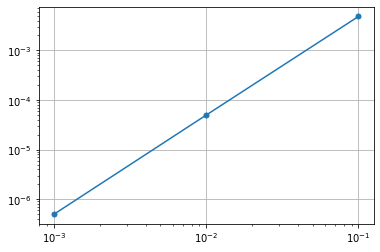

In [3]:
def f(t,y):
    return -y

y0 = 1
h = np.array([0.001,0.01,0.1])
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeEuler(f,np.array([0,h[n]]),y0)
    E[n] = np.abs(np.exp(-h[n]) - y[1])

plt.loglog(h,E,'.-',ms=10)
plt.grid(True)
plt.show()

The **order** of a numerical method for differential equations is $m$ if

$$
E_{local}(h) = O(h^{m+1})
$$

Note that $m+1$ is the slope in the plot $\log(E_{local})$ versus $\log(h)$.

## Example

$$
y' = -\frac{y}{t} \ , \ y(1) = 1
$$

$$
y(t) = \frac{1}{t}
$$

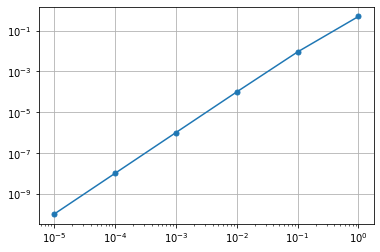

In [4]:
def f(t,y):
    return -y/t

y0 = 1; t0 = 1;
h = np.logspace(0,-5,6)
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeEuler(f,np.array([t0,t0 + h[n]]),y0)
    E[n] = np.abs(1/(t0 + h[n]) - y[1])

plt.loglog(h,E,'.-',ms=10)
plt.grid(True)
plt.show()

Note that the function `numpy.logspace` works as follows:

In [5]:
np.logspace(0,-5,6)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05])

## Heun's method

Euler's method is order 1 and uses linear approximation (degree 1 Taylor polynomial). What about higher order methods?

\begin{align*}
y(t + h) &= y(t) + y'(t)h + \frac{y''(t)h^2}{2} + \frac{y'''(c)h^3}{6} \\
y(t + h) &\approx y(t) + y'(t)h + \frac{y''(t)h^2}{2} \\
y(t + h) &\approx y(t) + \left( \frac{2 y'(t) + y''(t)h}{2} \right) h \\
y(t + h) &\approx y(t) + \left( \frac{y'(t) + y'(t) + y''(t)h}{2} \right) h \\
\end{align*}

We know $y'(t) = f(t,y)$ and the degree 1 Taylor polynomial of $y'(t)$ is

$$
y'(t + h) \approx y'(t) + y''(t)h
$$

Therefore

\begin{align*}
y(t_1) &\approx y(t_0) + \left( \frac{y'(t_0) + y'(t_0) + y''(t_0)h}{2} \right) h \\
y(t_1) &\approx y(t_0) + \left( \frac{y'(t_0) + y'(t_1)}{2} \right) h \\
y(t_1) &\approx y(t_0) + \left( \frac{f(t_0,y_0) + f(t_1,y_1)}{2} \right) h \\
\end{align*}

But we don't know what $y_1$ is! What do we do? Use Euler's method to approximate $y_1$ to plug into $f(t_1,y_1)$.

\begin{align*}
\tilde{y}_1 &= y_0 + f(t_0,y_0)h \\
y_1 &= y_0 + \left( \frac{f(t_0,y_0) + f(t_1,\tilde{y}_1)}{2} \right) h
\end{align*}

This is called [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method):

\begin{align*}
k_1 &= f(t_0,y_0) \\
k_2 &= f(t_1,y_0 + k_1 h) \\
y_1 &= y_0 + \frac{k_1 + k_2}{2} h
\end{align*}

## Implementation

In [6]:
def odeHeun(f,t,y0):
    y = np.zeros(t.shape)
    y[0] = y0
    for n in range(0,len(t) - 1):
        h = t[n + 1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n + 1], y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

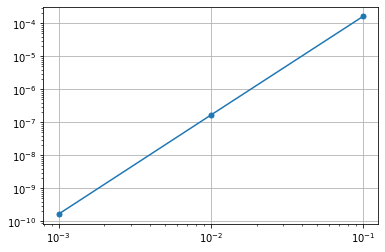

In [7]:
def f(t,y):
    return -y

y0 = 1
h = np.array([0.001,0.01,0.1])
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeHeun(f,np.array([0,h[n]]),y0)
    E[n] = np.abs(np.exp(-h[n]) - y[1])

plt.loglog(h,E,'.-',ms=10)
plt.grid(True)
plt.show()

The sloped of the loglog plot is 3 as expected since Heun's method is order 2.